### Imports

In [1]:
import numpy as np
import pandas as pd
import timeit
from mcts.mcts import mcts_search, get_best_action_trajectory
from mcts.tree_viz import render_pyvis
from state_evaluation.reinforcement_learning import MCTSRLWrapper, plot_state_image
from main import MeasurementControlEnvironment

### Create Game Environment and RL Wrapper (This initializes NN at random)

In [2]:
# Create the environment and RL wrapper (This initiailizes a new random nerual network)
env = MeasurementControlEnvironment(init_reset=False)
rl = MCTSRLWrapper(env, 'new', env.N, width_pixels=30, width_meters=50)

Toy Measurement Control Initialized
Using device: cuda
Model loaded


### Load Object Configuration from `object_configurations` folder

In [3]:
env.object_manager.df = pd.read_pickle('object_configurations/occlusion_failure1.pkl')
env.draw_state(env.get_state())

ValueError: Car state is not set, call reset() or pass the state.

### Reset to get Random Object Configuration

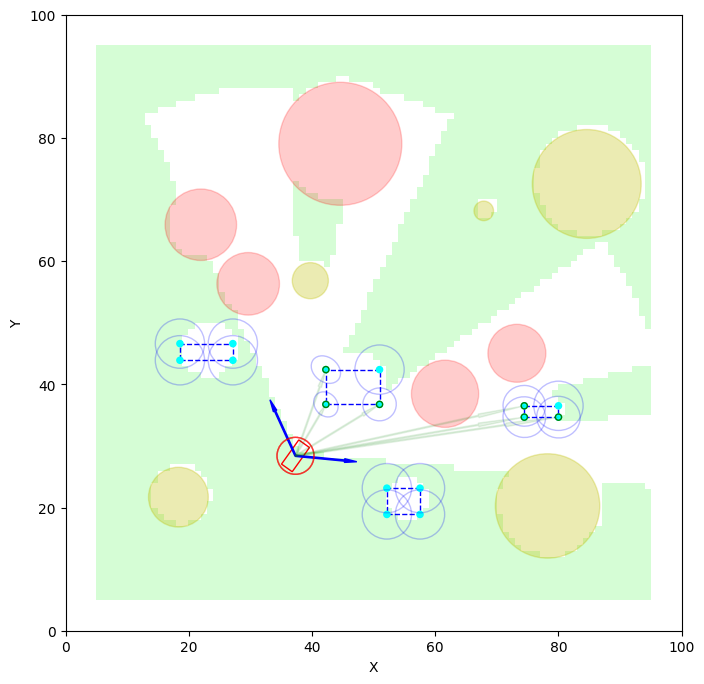

In [5]:
env.reset()
env.draw_state(env.get_state())

### Save an Object Configuration to a file

In [ ]:
env.object_manager.df.to_pickle('object_configurations/occlusion_failure1.pkl')

### Run the search

In [ ]:
# Get starting state
state = env.get_state()
print(f'Starting car state: {state[0]}')
# rl.plot_state_image(state)

print('Starting MCTS search...')
start_time = timeit.default_timer()
learning_iterations = 100
best_action_idx, root = mcts_search(env, rl, state, learning_iterations=learning_iterations,
                                    explore_factor=0.3, discount_factor=1.0)
print(f'Finished in {timeit.default_timer() - start_time} seconds')
print(f'Average time per learning iteration: {(timeit.default_timer() - start_time) / learning_iterations} seconds')
best_child = root.children[root.best_child()]
print(f'Final Q Value: {root.reward + best_child.Q}')

### Plot (also open `tree_visualization.html` in browser)

In [ ]:
# Create the tree visualization html file
print('Making tree visualization, this takes a while for a large tree...')
render_pyvis(root, env.action_space, show_unsimulated=False)

# Plot the starting state with the search tree overlayed
print('Plotting starting state with search tree overlayed...')
env.draw_state(state, plot_explore_grid=True, root_node=root, scaling=4, bias=0.1, max=1., rew=True)

# Get the action trajectory and create video of the action set
print('Getting best action trajectory...')
actions = get_best_action_trajectory(root, highest_Q=True)
print(f'{len(actions)} actions in best trajectory')
truncated_actions = actions[:-1] # Reduce loading time by truncating the action set (-1 is all actions)
print('Creating action set visualization...')
env.draw_action_set(root, truncated_actions)